# Impact Functions

# ImpactFunc class

Contains the definition of one impact function. The collection of `ImpactFunc` is defined in the class 
`ImpactFuncSet`, which is explained [below](#ImpactFuncSet-class).

In [1]:
from climada.entity import ImpactFunc
# Some degub information will appear the first time

2019-01-23 08:57:34,025 - climada - DEBUG - Loading default config file: /Users/aznarsig/Documents/Python/climada_python/climada/conf/defaults.conf


/Users/aznarsig/anaconda3/envs/climada_env_new/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Let's fill the values of an impact function manually.

In [2]:
imp_fun = ImpactFunc() # instance an impact function
dir(imp_fun) # see all methods and attributes

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'calc_mdr',
 'check',
 'haz_type',
 'id',
 'intensity',
 'intensity_unit',
 'mdd',
 'name',
 'paa',
 'plot']

In [3]:
imp_fun.__dict__ # see only the attributes

{'id': '',
 'name': '',
 'intensity_unit': '',
 'haz_type': '',
 'intensity': array([], dtype=float64),
 'mdd': array([], dtype=float64),
 'paa': array([], dtype=float64)}

In [4]:
help(imp_fun) # see explanation of the class, its methods and attributes

Help on ImpactFunc in module climada.entity.impact_funcs.base object:

class ImpactFunc(builtins.object)
 |  Contains the definition of one impact function.
 |  
 |  Attributes:
 |      haz_type (str): hazard type acronym (e.g. 'TC')
 |      id (int or str): id of the ImpactFunc (wrt vulnerabilities of same
 |         hazard). Preferably int, otherwie short string.
 |      name (str): name of the ImpactFunc
 |      intensity_unit (str): unit of the intensity
 |      intensity (np.array): intensity values
 |      mdd (np.array): mean damage (impact) degree for each intensity (numbers
 |          in [0,1])
 |      paa (np.array): percentage of affected assets (exposures) for each
 |          intensity (numbers in [0,1])
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Empty initialization.
 |  
 |  calc_mdr(self, inten)
 |      Interpolate impact function to a given intensity.
 |      
 |      Parameters:
 |          inten (float or np.array): intensity, the x-coordinate of

As you see, the attributes `intensity`, `mdd` and `paa` are numpy arrays. Check out how to initialize a numpy array.

### EXERCISE
Fill the impact function imp_fun with dummy values

In [5]:
# Put your code here:
# imp_fun.haz_type = ...
# imp_fun.intensity = ...





In [6]:
# SOLUTION:
# intensity, mdd and paa are 1-dimensional numpy arrays, hence:
import numpy as np
imp_fun.haz_type = 'TC'
imp_fun.id = 3
imp_fun.name = 'TC Building code'
imp_fun.intensity_unit = 'm/s'
imp_fun.intensity = np.linspace(0, 100, num=15)
imp_fun.mdd = np.sort(np.random.rand(15))
imp_fun.paa = np.sort(np.random.rand(15))

### EXERCISE

Check your intensity array by indexing and slicing the arrays:

In [7]:
# Put your code here
# All values:

# First to penultimate values:

# Last value:

# Last two values:

# First 5 values:


In [8]:
# SOLUTION:
# An example:
print('All values:', imp_fun.intensity[:])
print('First to penultimate values:', imp_fun.intensity[0:-1]) 
print('Last value:', imp_fun.intensity[-1])   
print('Last two values:', imp_fun.intensity[-2:])   
print('First 5 values:', imp_fun.intensity[0:5])

All values: [  0.           7.14285714  14.28571429  21.42857143  28.57142857
  35.71428571  42.85714286  50.          57.14285714  64.28571429
  71.42857143  78.57142857  85.71428571  92.85714286 100.        ]
First to penultimate values: [ 0.          7.14285714 14.28571429 21.42857143 28.57142857 35.71428571
 42.85714286 50.         57.14285714 64.28571429 71.42857143 78.57142857
 85.71428571 92.85714286]
Last value: 100.0
Last two values: [ 92.85714286 100.        ]
First 5 values: [ 0.          7.14285714 14.28571429 21.42857143 28.57142857]


### EXERCISE
1. Get all the percentage of affected assets of your impact function (`imp_fun.paa`) such that
 the mean damage degree (`imp_fun.mdd`) AND percentage of affected assets (`imp_fun.paa`) are greater than 0.8.

2. Replace those PAA values with 1.



In [9]:
# Put your code here
print('MDD before:', imp_fun.mdd)
print('PAA before:', imp_fun.paa)

# hint: Try first "imp_fun.mdd > 0.8 and imp_fun.paa > 0.8" and it wont't work. 
# Check numpy documentation on logic routines: 
# https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.logic.html

print('MDD after:', imp_fun.mdd)
print('PAA after:', imp_fun.paa)

MDD before: [0.15427462 0.17156438 0.26343775 0.27496577 0.29512765 0.34200817
 0.53078609 0.5414884  0.57219735 0.69368424 0.73843992 0.73945169
 0.78743949 0.96903439 0.98179638]
PAA before: [0.18164097 0.20078105 0.22826791 0.2603653  0.42603179 0.45458699
 0.46633772 0.48388248 0.53287477 0.59637464 0.66993087 0.76789645
 0.82560541 0.89699246 0.98180401]
MDD after: [0.15427462 0.17156438 0.26343775 0.27496577 0.29512765 0.34200817
 0.53078609 0.5414884  0.57219735 0.69368424 0.73843992 0.73945169
 0.78743949 0.96903439 0.98179638]
PAA after: [0.18164097 0.20078105 0.22826791 0.2603653  0.42603179 0.45458699
 0.46633772 0.48388248 0.53287477 0.59637464 0.66993087 0.76789645
 0.82560541 0.89699246 0.98180401]


In [10]:
# SOLUTION:
print('MDD before:', imp_fun.mdd)
print('PAA before:', imp_fun.paa)
print()

# PAA which fulfil the condition:
to_change = np.logical_and(imp_fun.mdd > 0.8, imp_fun.paa > 0.8)
print('Values to change: ', imp_fun.mdd[to_change])
# Change those values
imp_fun.mdd[to_change] = 1

print()
print('MDD after:', imp_fun.mdd)
print('PAA after:', imp_fun.paa)

MDD before: [0.15427462 0.17156438 0.26343775 0.27496577 0.29512765 0.34200817
 0.53078609 0.5414884  0.57219735 0.69368424 0.73843992 0.73945169
 0.78743949 0.96903439 0.98179638]
PAA before: [0.18164097 0.20078105 0.22826791 0.2603653  0.42603179 0.45458699
 0.46633772 0.48388248 0.53287477 0.59637464 0.66993087 0.76789645
 0.82560541 0.89699246 0.98180401]

Values to change:  [0.96903439 0.98179638]

MDD after: [0.15427462 0.17156438 0.26343775 0.27496577 0.29512765 0.34200817
 0.53078609 0.5414884  0.57219735 0.69368424 0.73843992 0.73945169
 0.78743949 1.         1.        ]
PAA after: [0.18164097 0.20078105 0.22826791 0.2603653  0.42603179 0.45458699
 0.46633772 0.48388248 0.53287477 0.59637464 0.66993087 0.76789645
 0.82560541 0.89699246 0.98180401]


### EXERCISE
Compute the mean damage ratios (MDR) for each PAA and MDD of the impact function. Remember: MDR = PAA * MDD.

In [11]:
# Put your code here





In [12]:
# Solution

# notice that you can add new attributes to your instance:
imp_fun.mdr = imp_fun.mdd * imp_fun.paa
imp_fun.mdr

array([0.02802259, 0.03444688, 0.06013438, 0.07159155, 0.12573376,
       0.15547246, 0.24752557, 0.26201675, 0.30490953, 0.41369569,
       0.4947037 , 0.56782233, 0.65011431, 0.89699246, 0.98180401])

So much about the attributes. The methods of the `ImpactFunc` are `check()`, `interpolate()` and `plot()`. Let's see how to use them with some exercises.

### EXERCISE

Check that the values introduced in your impact function have the right length using its methods.

In [13]:
# Put your code here
# hint: if needed, use againt the ImpactFunc documentation to see which method is meant to do this.






In [14]:
# SOLUTION:
imp_fun.check()

If an impact function has a wrong value, the following error is thrown. The first line explains the ERROR and the following lines show the traceback:

In [15]:
imp_fun.intensity = np.array([0, 1])
try:
    imp_fun.check()
except ValueError:
    print('Error caught')
# put the correct value of the intensity again
imp_fun.intensity = np.linspace(0, 100, num=15)

2019-01-23 08:57:36,153 - climada.util.checker - ERROR - Invalid ImpactFunc.mdd size: 2 != 15.
Error caught


### EXERCISE

Interpolate the PAA and MDD values to the following intensity array:

In [16]:
new_inten = np.linspace(0, 100, num=20)

# Put your code here





In [17]:
# SOLUTION:
new_inten = np.linspace(0, 100, num=20)
new_mdd = np.interp(new_inten, imp_fun.intensity, imp_fun.mdd)
new_paa = np.interp(new_inten, imp_fun.intensity, imp_fun.paa)

### EXERCISE

Plot the imp_fun PAA, MDD and MDR values,.

In [18]:
# Put your code here:





(<Figure size 288x288 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x1a1a194278>])

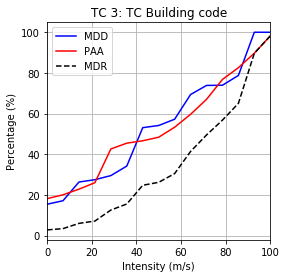

In [19]:
# SOLUTION:
imp_fun.plot()

# ImpactFuncSet class

Now we will gather a collection of impact functions using the `ImpactFuncSet` class. 
We will use the file `ENT_TEMPLATE_XLS` to this end.

In [20]:
from climada.entity import ImpactFuncSet
from climada.util import ENT_TEMPLATE_XLS

The impact function values can be filled at instantation or using the method `read()`.

In [21]:
# File read and impact functions filled at construction
imp_fun_set = ImpactFuncSet(ENT_TEMPLATE_XLS)

2019-01-23 08:57:36,515 - climada.entity.impact_funcs.impact_func_set - INFO - Reading file: /Users/aznarsig/Documents/Python/climada_python/data/system/entity_template.xlsx


In [22]:
# Read and fill after construction.
imp_fun_set = ImpactFuncSet()
imp_fun_set.read(ENT_TEMPLATE_XLS)

2019-01-23 08:57:36,589 - climada.entity.impact_funcs.impact_func_set - INFO - Reading file: /Users/aznarsig/Documents/Python/climada_python/data/system/entity_template.xlsx


See which impact functions are contained with the `get_ids()` method. Its output shows the hazard for which the impact function has been defined, and all the different impact functions ids contained for each hazard.

In [23]:
imp_fun_set.get_ids()

{'TC': [1, 3],
 'TS': [1],
 'WS': [1],
 'EQ': [1],
 'VQ': [1],
 'TR': [1],
 'LS': [1],
 'FL': [1],
 'HS': [1],
 'BF': [1]}

Too see how many impact functions there are, use the `size()` method. You might use `help(imp_fun_set.size)` to see the description of the method inputs.

In [24]:
print('Total number of impact functions:', imp_fun_set.size())
print('Number of impact functions with Id=1:', imp_fun_set.size(fun_id=1))
print('Number of impact functions for tropical cyclones:', imp_fun_set.size(haz_type='TC'))

Total number of impact functions: 11
Number of impact functions with Id=1: 10
Number of impact functions for tropical cyclones: 2


Other methods are `remove_func()`, `add_func()`, `get_hazard_types()` and `plot()`. The `append()` and `clear()` methods are used to merge with an other `ImpactFuncSet` instance and to clear all the variable contents, respectively.

### EXERCISE

Remove the impact function of hazard 'TC' with id 3. 
After this, add our previos ImpactFunc imp_fun to the current ImpactFuncSet.

In [25]:
# Previous impact function
imp_fun = ImpactFunc()
imp_fun.haz_type = 'TC'
imp_fun.id = 3
imp_fun.name = 'TC Building code'
imp_fun.intensity_unit = 'm/s'
imp_fun.intensity = np.linspace(0, 100, num=15)
imp_fun.mdd = np.sort(np.random.rand(15))
imp_fun.paa = np.sort(np.random.rand(15))

# Put your code here
# hint: check available methods in ImpactFuncSet class.



In [26]:
# SOLUTION:
# Previous impact function
imp_fun = ImpactFunc()
imp_fun.haz_type = 'TC'
imp_fun.id = 3
imp_fun.name = 'TC Building code'
imp_fun.intensity_unit = 'm/s'
imp_fun.intensity = np.linspace(0, 100, num=15)
imp_fun.mdd = np.sort(np.random.rand(15))
imp_fun.paa = np.sort(np.random.rand(15))

# Remove and add
imp_fun_set.remove_func(fun_id=3, haz_type='TC')
print('Total number of impact functions after removal:', imp_fun_set.size())
imp_fun_set.add_func(imp_fun)
print('Total number of impact functions after addition:', imp_fun_set.size())


Total number of impact functions after removal: 10
Total number of impact functions after addition: 11


### EXERCISE

Remove all impact functions of the hazard volcano ('VQ') and get all the remaing hazard type contained.

In [27]:
# Put your code here





In [28]:
# SOLUTION:
imp_fun_set.remove_func(haz_type='VQ')
imp_fun_set.get_hazard_types()

['TC', 'TS', 'WS', 'EQ', 'TR', 'LS', 'FL', 'HS', 'BF']

### EXERCISE
Plot the impact function of the hazard flood ('FL').

In [29]:
# Put your code here





(<Figure size 288x288 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x1a26417940>])

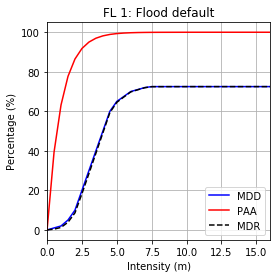

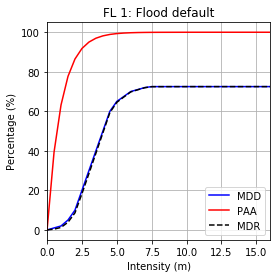

In [30]:
# SOLUTION:

imp_fun_set.get_func(haz_type='FL')[0].plot()
# OR
imp_fun_set.plot(haz_type='FL')

ImpactFuncSet can plot several functions as well. This is done using the `Graph2D` class in the `climada.util.plot` module.

When the number of functions is too high, however, the arrangement of the subplots might not be optimal. This is why the plot function returns the figure and axes as variables, so that the user might be able to modify the plots to his needs:

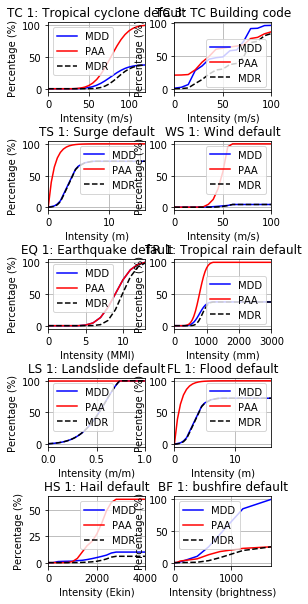

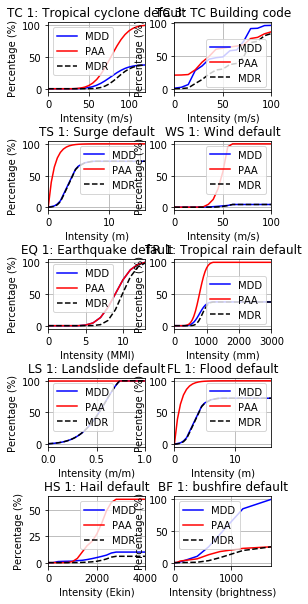

In [31]:
# If you don't want to modify the figure:
imp_fun_set.plot()

# If you want to modify the figure:
fig, axes = imp_fun_set.plot()

### EXERCISE
Plot the two impact functions of the tropical cyclone and make them look nice for you. 
You might want to share the y axis and change the title or labels, for instance.

In [32]:
# Put your code here





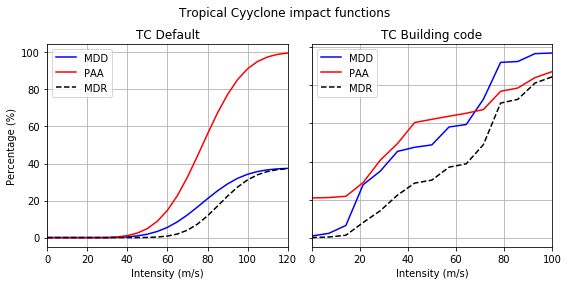

In [33]:
# SOLUTION:
import matplotlib.pyplot as plt

fig, axes = imp_fun_set.plot(haz_type='TC')
axes[0].get_shared_y_axes().join(axes[0], axes[1])
axes[0].set_title('TC Default')
axes[1].set_yticklabels([])
axes[1].set_ylabel('')
axes[1].set_title('TC Building code')
fig.suptitle('Tropical Cyyclone impact functions')

plt.tight_layout()
plt.subplots_adjust(top=0.85)